In [1]:
# 1) Loaded the Dataset
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


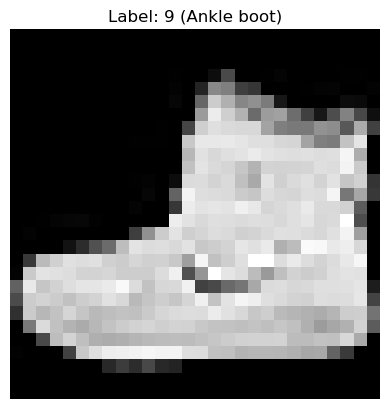

In [2]:
# 2) Explore the Data: shapes + one example image
import matplotlib.pyplot as plt

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape :", x_test.shape)
print("y_test shape :", y_test.shape)

# Class names per Fashion-MNIST mapping (0-9). :contentReference[oaicite:2]{index=2}
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Show a sample image from training set
idx = 0  # change this index to inspect different images
plt.figure()
plt.imshow(x_train[idx], cmap="gray")
plt.title(f"Label: {y_train[idx]} ({class_names[y_train[idx]]})")
plt.axis("off")
plt.show()


In [3]:
# 3) Data Preprocessing: normalize to [0,1] and add channel dimension
import numpy as np

# Convert to float32 then scale
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Add channel dimension for Conv2D: (28, 28) -> (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

print("After preprocessing:")
print("x_train shape:", x_train.shape)
print("x_test shape :", x_test.shape)

After preprocessing:
x_train shape: (60000, 28, 28, 1)
x_test shape : (10000, 28, 28, 1)


In [4]:
# 4) Model Building: Sequential CNN + summary
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")])

model.summary()


C:\Users\adity\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 5) Model Compilation
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [6]:
# 6) Model Training
# Adjust epochs as per user (e.g., 5, 10, 15); 10 is a common starting point.
EPOCHS = 10
BATCH_SIZE = 64

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2
)


Epoch 1/10
938/938 - 52s - 55ms/step - accuracy: 0.8256 - loss: 0.4856 - val_accuracy: 0.8658 - val_loss: 0.3700
Epoch 2/10
938/938 - 81s - 86ms/step - accuracy: 0.8843 - loss: 0.3197 - val_accuracy: 0.8882 - val_loss: 0.3139
Epoch 3/10
938/938 - 84s - 90ms/step - accuracy: 0.9006 - loss: 0.2746 - val_accuracy: 0.8951 - val_loss: 0.2899
Epoch 4/10
938/938 - 80s - 85ms/step - accuracy: 0.9109 - loss: 0.2440 - val_accuracy: 0.9017 - val_loss: 0.2697
Epoch 5/10
938/938 - 48s - 51ms/step - accuracy: 0.9208 - loss: 0.2173 - val_accuracy: 0.9089 - val_loss: 0.2533
Epoch 6/10
938/938 - 46s - 49ms/step - accuracy: 0.9273 - loss: 0.1967 - val_accuracy: 0.9089 - val_loss: 0.2575
Epoch 7/10
938/938 - 83s - 88ms/step - accuracy: 0.9339 - loss: 0.1787 - val_accuracy: 0.9108 - val_loss: 0.2461
Epoch 8/10
938/938 - 47s - 50ms/step - accuracy: 0.9388 - loss: 0.1629 - val_accuracy: 0.9025 - val_loss: 0.2839
Epoch 9/10
938/938 - 83s - 89ms/step - accuracy: 0.9453 - loss: 0.1463 - val_accuracy: 0.9054 - 

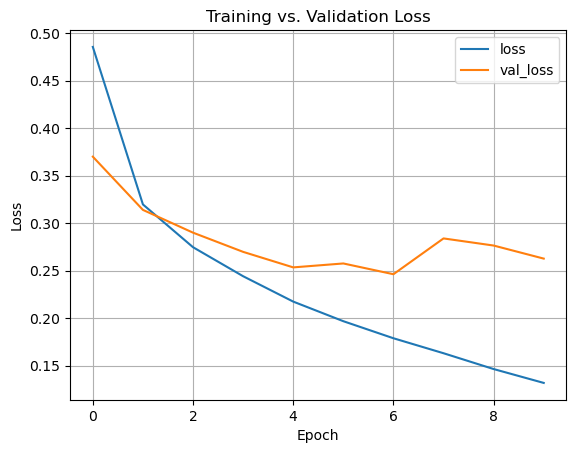

In [7]:
# 7) Plot: training vs. validation loss
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Training vs. Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


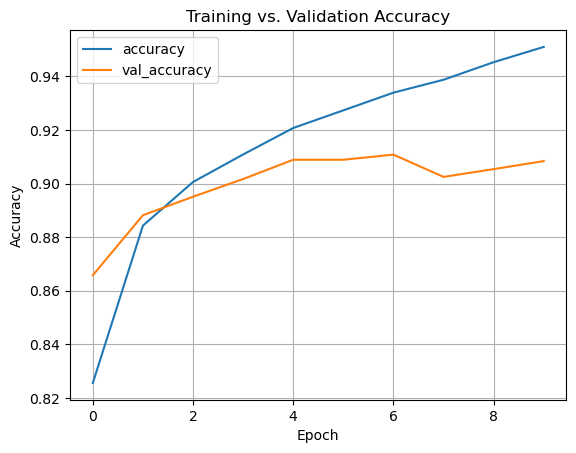

In [8]:
# 8) Plot: training vs. validation accuracy
plt.figure()
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("Training vs. Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# 9) Prediction and Evaluation: classification report + confusion matrix
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict class probabilities, then take argmax to get predicted class indices
y_proba = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_proba, axis=1)

print("Classification Report:")
print(classification_report(
    y_test, y_pred,
    labels=list(range(10)),
    target_names=class_names,
    digits=4
))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=list(range(10)))
print(cm)


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top     0.8045    0.8970    0.8482      1000
     Trouser     0.9990    0.9760    0.9874      1000
    Pullover     0.8626    0.8850    0.8736      1000
       Dress     0.9269    0.9000    0.9132      1000
        Coat     0.8691    0.8430    0.8558      1000
      Sandal     0.9715    0.9880    0.9797      1000
       Shirt     0.7489    0.7070    0.7274      1000
     Sneaker     0.9779    0.9310    0.9539      1000
         Bag     0.9839    0.9780    0.9809      1000
  Ankle boot     0.9468    0.9790    0.9626      1000

    accuracy                         0.9084     10000
   macro avg     0.9091    0.9084    0.9083     10000
weighted avg     0.9091    0.9084    0.9083     10000

Confusion Matrix:
[[897   0  16   5   2   1  73   0   6   0]
 [  5 976   0  13   4   0   0   0   2   0]
 [ 22   0 885   6  32   0  53   0   2   0]
 [ 29   0  12 900  29   0  30   0   0   0]
 [  2   0  51  25 843   0  7

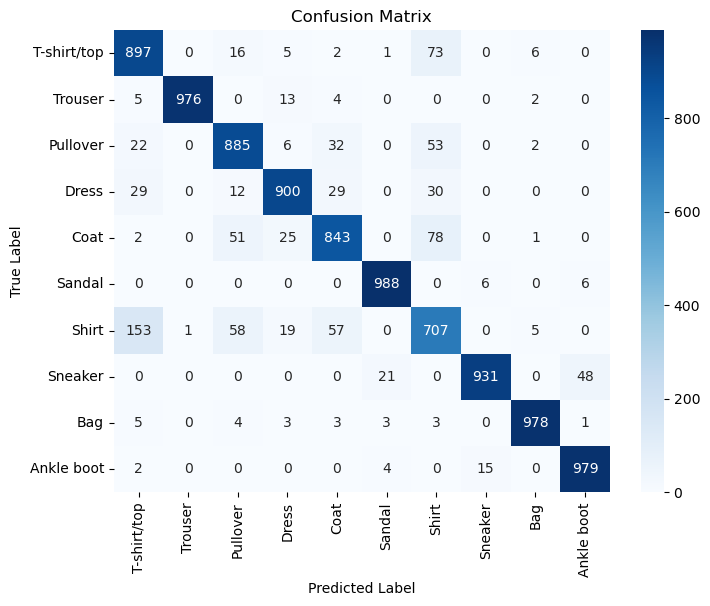

In [10]:
# 10) Visualize the Confusion Matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


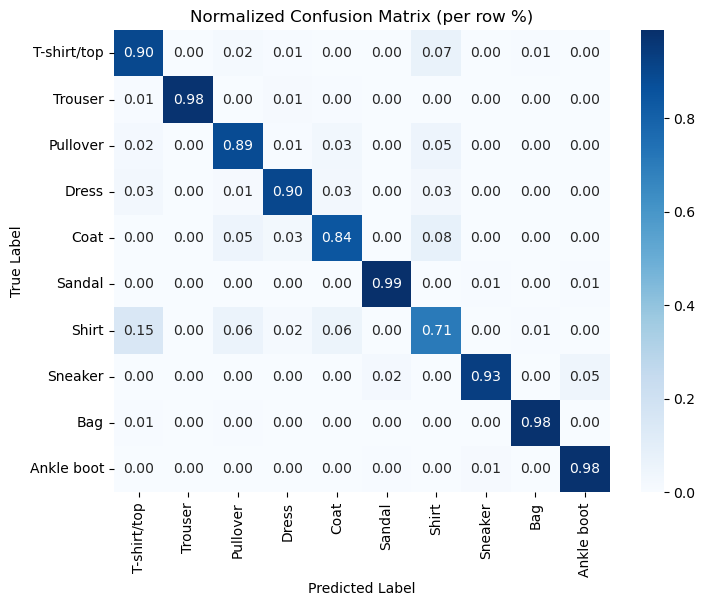

In [11]:
# 11) Normalized Confusion Matrix (percentages per row)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Normalize confusion matrix row-wise (per true label)
cm_normalized = cm.astype("float32") / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

plt.title("Normalized Confusion Matrix (per row %)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [12]:
# 12) Final Model Evaluation on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc:.4f}")
print(f"Final Test Loss    : {test_loss:.4f}")


Final Test Accuracy: 0.9084
Final Test Loss    : 0.2626


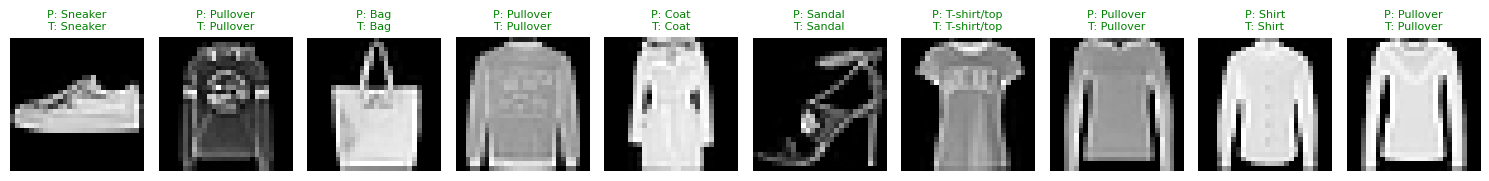

In [13]:
# 13) Visualize sample predictions with true vs predicted labels
num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
    pred_label = class_names[y_pred[idx]]
    true_label = class_names[y_test[idx]]
    color = "green" if y_pred[idx] == y_test[idx] else "red"
    plt.title(f"P: {pred_label}\nT: {true_label}", color=color, fontsize=8)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [14]:
# 14) Save the trained model (Recommended Keras format)
model.save("fashion_mnist_cnn_model.keras")
print("Model saved as fashion_mnist_cnn_model.keras")


Model saved as fashion_mnist_cnn_model.keras


In [15]:
# 15) Load model back (verification)
from tensorflow.keras.models import load_model

loaded_model = load_model("fashion_mnist_cnn_model.keras")
loss, acc = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f"Reloaded Model Accuracy: {acc:.4f}")


Reloaded Model Accuracy: 0.9084


Enter an index (0 - 9999) to test:  4567


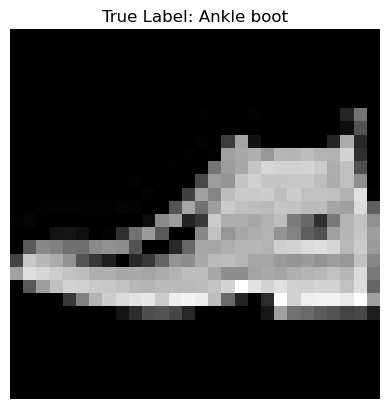


Predicted Label: Ankle boot
Confidence Scores (per class):

T-shirt/top : 0.0000
Trouser     : 0.0000
Pullover    : 0.0000
Dress       : 0.0000
Coat        : 0.0000
Sandal      : 0.0000
Shirt       : 0.0000
Sneaker     : 0.0000
Bag         : 0.0000
Ankle boot  : 1.0000


In [16]:
# 16) Interactive Prediction on a Test Image
idx = int(input(f"Enter an index (0 - {len(x_test)-1}) to test: "))

# Show the chosen image
plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
plt.title(f"True Label: {class_names[y_test[idx]]}")
plt.axis("off")
plt.show()

# Model prediction
proba = model.predict(x_test[idx].reshape(1, 28, 28, 1), verbose=0)
pred_class = class_names[proba.argmax()]

print(f"\nPredicted Label: {pred_class}")
print(f"Confidence Scores (per class):\n")
for cname, p in zip(class_names, proba[0]):
    print(f"{cname:12}: {p:.4f}")


In [17]:
!pip install Pillow


Model predicts: Shirt

Prediction probabilities:
T-shirt/top    : 0.0148
Trouser        : 0.0006
Pullover       : 0.0135
Dress          : 0.0362
Coat           : 0.0173
Sandal         : 0.0000
Shirt          : 0.9103
Sneaker        : 0.0001
Bag            : 0.0029
Ankle boot     : 0.0043


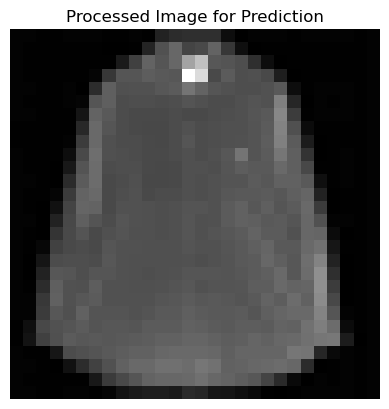

In [18]:
# Import necessary libraries for image processing
from PIL import Image
import numpy as np

# 1. User Input: Get the path to the custom image file
image_path = r"C:\Users\adity\Downloads\OIP (1).jpeg"#input("Enter the path to your custom image file: ")

# 2. Image Processing
try:
    # Load the image
    img = Image.open(image_path)

    # Convert to grayscale if it's not already
    img = img.convert('L')

    # Resize the image to 28x28 pixels
    img = img.resize((28, 28))

    # Convert image to numpy array
    img_array = np.array(img)

    # Invert the colors since Fashion-MNIST images are dark on a light background
    # and custom images might be light on a dark background.
    img_array = 255 - img_array

    # Normalize pixel values to be between 0 and 1, just like the training data
    img_array = img_array.astype('float32') / 255.0

    # Add a channel dimension and a batch dimension to the array
    # The model expects an input shape of (batch_size, 28, 28, 1)
    custom_image = np.expand_dims(img_array, axis=0)
    custom_image = np.expand_dims(custom_image, axis=-1)

    # 3. Make a Prediction with the Trained Model
    prediction = model.predict(custom_image, verbose=0)
    predicted_class_index = np.argmax(prediction)

    # 4. Display the results
    class_names = [
        "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
    ]
    predicted_label = class_names[predicted_class_index]

    print(f"\nModel predicts: {predicted_label}")
    print("\nPrediction probabilities:")
    for i, prob in enumerate(prediction[0]):
        print(f"{class_names[i]:15}: {prob:.4f}")

    # Display the processed image
    import matplotlib.pyplot as plt
    plt.imshow(img_array, cmap='gray')
    plt.title("Processed Image for Prediction")
    plt.axis("off")
    plt.show()

except FileNotFoundError:
    print(f"Error: The file at {image_path} was not found. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")